# Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Dataset Loading

In [2]:
# Load the dataset (ensure the file path is correct)
file_path = "C:/Academics/Project/USL/Last.FM/Last.fm_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


# Resampling and EDA

In [14]:
df_sample = df.sample(n=10000, random_state=42)
df_sample.head()

,Unnamed: 0,Username,Artist,Track,Album,Date,Time,combined
87677,127330,massdosage,Disturbed,Down With the Sickness,The Sickness,30 Jan 2021,10:45,massdosage Disturbed Down With the Sickness Th...
76605,98734,eartle,Seatbelts,Tank!,COWBOY BEBOP Tank! THE! BEST!,30 Jan 2021,15:15,eartle Seatbelts Tank! COWBOY BEBOP Tank! THE!...
36595,46560,franhale,Porches,Goodbye,The House,30 Jan 2021,22:33,franhale Porches Goodbye The House
140409,220559,jonocole,The Chameleons,Swamp Thing,Strange Times,23 Jan 2021,17:53,jonocole The Chameleons Swamp Thing Strange Times
151960,248055,isaac,Antônio Carlos Jobim,Corcovado,"The Composer Of Desafinado, Plays (Classics In...",30 Jan 2021,15:23,isaac Antônio Carlos Jobim Corcovado The Compo...


In [9]:
# Handle NaN values in the 'combined' column
df_sample['combined'] = df_sample['combined'].fillna('')

# Initialize the TF-IDF vectorizer (limiting to 500 features for manageability)
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(df_sample['combined'])

# Convert sparse matrix to dense (or use toarray())
tfidf_dense = tfidf_matrix.toarray()

print("TF-IDF matrix shape:", tfidf_dense.shape)


TF-IDF matrix shape: (10000, 500)


# Dimensionality Reduction

In [19]:
# Initialize PCA to reduce dimensions to 2
pca = PCA(n_components=2, random_state=42)

In [15]:
pca.fit(tfidf_dense)

PCA(n_components=2, random_state=42)

In [20]:
pca_results = pca.fit_transform(tfidf_dense)

print("PCA result shape:", pca_results.shape)

PCA result shape: (10000, 2)


# Visualization

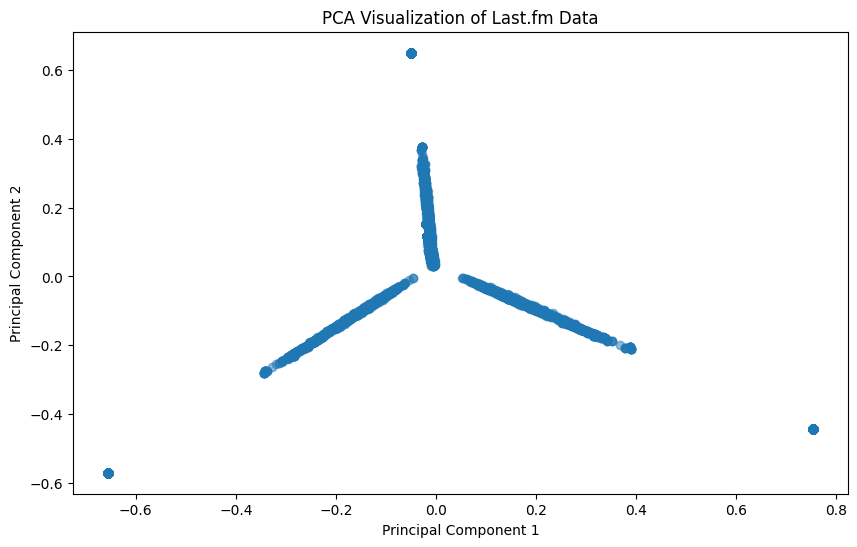

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.title("PCA Visualization of Last.fm Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


The above graph signifies that there are one of the four reasons why PCA is showing output:
1. Highly Sparse Vectors
2. Extreme Imbalances or Dominant Groups
3. Near-duplicate or repetitive patterns
4. Very few Terms 

In this case, it is an example of OPTION 1,2 and 3.